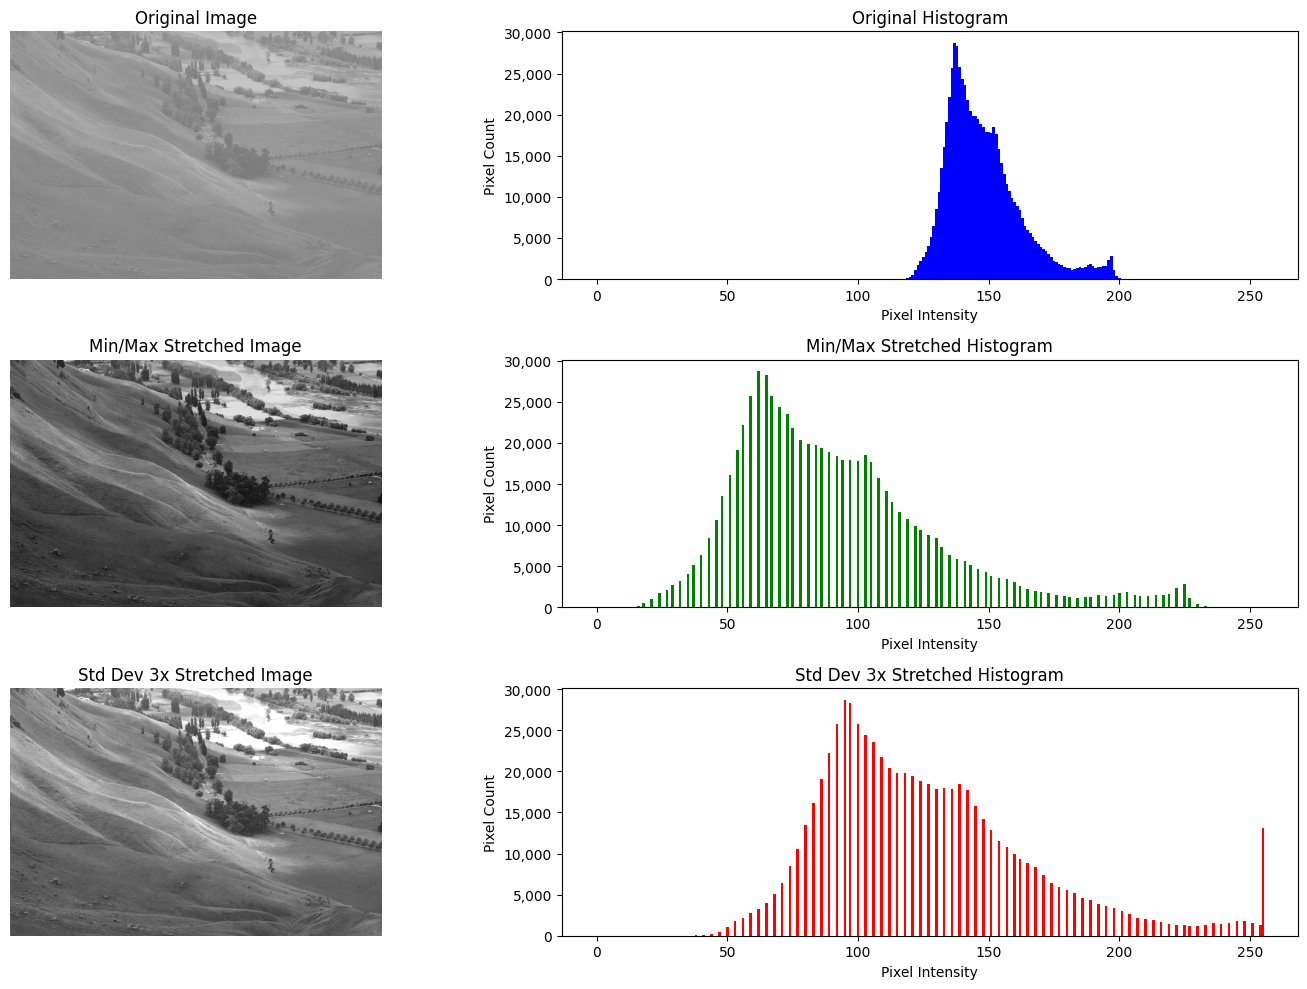

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 이미지 읽기 (흑백 모드)
gray_img = cv2.imread("histogram_example.jpg", cv2.IMREAD_GRAYSCALE)

# 최소값과 최대값 계산
p_min, p_max = np.min(gray_img), np.max(gray_img)

# 최소값과 최대값을 이용한 스트레칭
min_max_stretched_img = ((gray_img - p_min) / (p_max - p_min) * 255).astype(np.uint8)

# 평균과 표준 편차 계산
mean_val = np.mean(gray_img)
std_dev = np.std(gray_img)

# 표준편차의 3배 범위 스트레칭
lower_bound = mean_val - 3 * std_dev
upper_bound = mean_val + 3 * std_dev
std_dev_stretched_img = np.clip(gray_img, lower_bound, upper_bound)
std_dev_stretched_img = ((std_dev_stretched_img - lower_bound) / (upper_bound - lower_bound) * 255).astype(np.uint8)

# 원본 히스토그램 계산
original_hist = np.histogram(gray_img, bins=256, range=(0, 256))[0]

# 최소/최대값 방법 히스토그램 계산
min_max_stretched_hist = np.histogram(min_max_stretched_img, bins=256, range=(0, 256))[0]

# 표준 편차의 3배 방법 히스토그램 계산
std_dev_stretched_hist = np.histogram(std_dev_stretched_img, bins=256, range=(0, 256))[0]

# 결과 비교 시각화
rows, cols = 3, 2
chart_idx = 0
plt.figure(figsize=(15, 10))

# 원본 이미지
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Original Image")
plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

# 원본 히스토그램
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Original Histogram")
plt.bar(range(256), original_hist, color="blue", width=1)
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))

# 최소/최대값 스트레칭된 이미지
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Min/Max Stretched Image")
plt.imshow(min_max_stretched_img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

# 최소/최대값 스트레칭 후 히스토그램
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Min/Max Stretched Histogram")
plt.bar(range(256), min_max_stretched_hist, color="green", width=1)
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))

# 표준편차의 3배 스트레칭된 이미지
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Std Dev 3x Stretched Image")
plt.imshow(std_dev_stretched_img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

# 표준편차의 3배 스트레칭 후 히스토그램
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Std Dev 3x Stretched Histogram")
plt.bar(range(256), std_dev_stretched_hist, color="red", width=1)
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))

plt.tight_layout()
plt.show()